In [3]:
import numpy as np
import codecs
import re

In [31]:
count_dict = {'overall' : {}, '1': {}, '2': {}, '3': {}, '4': {}, '5': {}}

In [32]:
import json

with open("wordle_clean_list.json", "r") as fp:
    wordle_list = json.load(fp)
for word in wordle_list:
    for i in range(len(word)): 
        #if line[i] in abc_es: # avoid jump line, and final line chars
        count_dict['overall'][word[i]] = count_dict['overall'].get(word[i], 0) + 1
        count_dict[str(i+1)][word[i]] = count_dict[str(i+1)].get(word[i], 0) + 1

In [33]:
for key, value in count_dict['overall'].items():
    print(key, value)

n 203
i 267
e 342
v 60
h 51
u 172
s 150
o 511
t 179
a 697
f 65
l 254
j 43
d 123
c 210
r 413
z 39
m 146
b 118
ñ 16
p 123
g 97
y 11
x 15
q 10
k 5


In [28]:
def sort_dict(dictionary, reverse=True):
    return dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=reverse))

In [8]:
for key, value in count_dict.items():
    print(key, value)

overall {'a': 8976, 'b': 1299, 'c': 2391, 'o': 5524, 'd': 1315, 'i': 3598, 's': 3676, 'j': 814, 'e': 5497, 'l': 2783, 'n': 2823, 'p': 1631, 't': 2175, 'ñ': 374, 'r': 3787, 'f': 774, 'g': 1066, 'y': 442, 'z': 624, 'u': 2501, 'm': 1645, 'h': 768, 'v': 694, 'x': 133, 'q': 116, 'k': 55, 'w': 14}
1 {'a': 1342, 'b': 587, 'c': 1126, 'd': 368, 'e': 273, 'f': 467, 'g': 409, 'h': 370, 'i': 151, 'j': 283, 'k': 20, 'l': 551, 'm': 730, 'n': 290, 'o': 373, 'p': 887, 'q': 49, 'r': 645, 's': 580, 't': 765, 'u': 179, 'v': 340, 'w': 6, 'x': 6, 'y': 118, 'z': 150, 'ñ': 34}
2 {'b': 118, 'c': 158, 'd': 92, 'e': 1371, 'f': 61, 'g': 58, 'h': 183, 'i': 1359, 'j': 68, 'l': 427, 'm': 145, 'n': 211, 'o': 1564, 'p': 136, 'q': 6, 'r': 750, 's': 190, 't': 149, 'u': 1444, 'v': 86, 'x': 39, 'y': 33, 'z': 54, 'ñ': 52, 'a': 2340, 'k': 2, 'w': 3}
3 {'a': 834, 'e': 777, 'i': 808, 'o': 490, 'r': 1095, 's': 583, 'u': 526, 'c': 639, 'h': 56, 'l': 845, 'n': 780, 't': 594, 'm': 457, 'v': 128, 'd': 349, 'b': 359, 'f': 174, 'g'

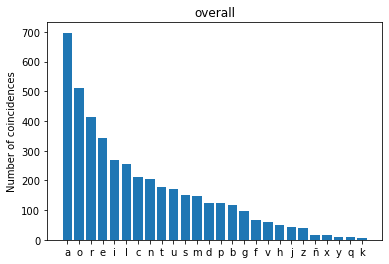

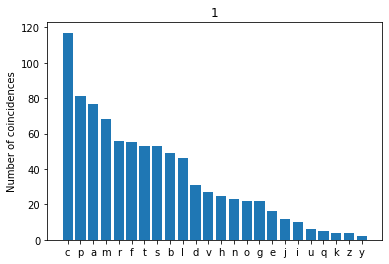

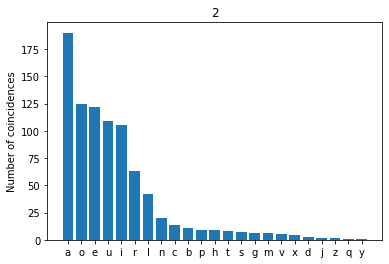

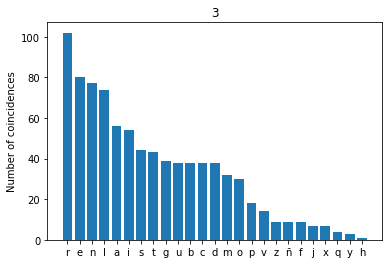

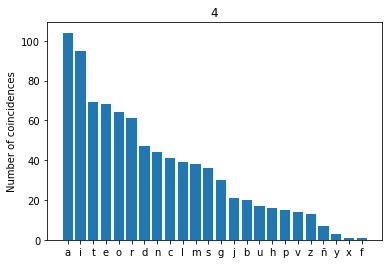

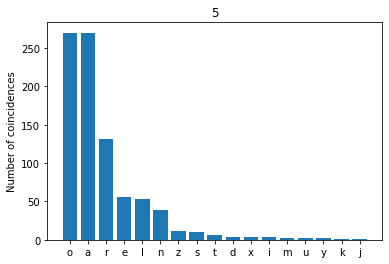

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

sorted_dict = {}

for d_name, dictionary in count_dict.items():
    sorted_dict[str(d_name)] = sort_dict(dictionary)

    D = sorted_dict[str(d_name)]
    plt.bar(*zip(*D.items()))
    plt.title(d_name)
    plt.ylabel('Number of coincidences')
    plt.show()

In [5]:
"""
FILTER FUNCION
Return the list of possible words which matches the filters:
	- raw_list : all the possible solutions of the wordle game
	- in_list : list of letters (string) that should be in the solution. default: empty list
	- not_l_list : list of letters (string) are NOT in the solution. default: empty list
	- first : first letter of the world. default: False
	- second : second letter of the world. default: False
	- third : third letter of the world. default: False
	- fourth : fourth letter of the world. default: False
	- fifth : fifth letter of the world. default: False
	- not_n_list : list of lists(strings) for each n position, of chars contained but not in the n position. default: empty list of lists
	- not_w_list : list of words which are not the solution. default: empty list
"""
def wordle_filter(raw_list, in_list=[], not_l_list='', first='.', second='.', third='.', fourth='.', fifth='.', not_n_list=[[], [], [], [], []], not_w_list=[]):

	filt_list = raw_list

	# Check that NOT contain all not contained chars
	for char in not_l_list:
		filt_list = list(filter(re.compile(f"[^{char}][^{char}][^{char}][^{char}][^{char}]").match, filt_list))

	# Check that contain all contained chars
	for char in in_list:
		filt_list = list(filter(re.compile(f".*[{char}]").match, filt_list))

	# Check char in desires positions
	filt_list = list(filter(re.compile(f"{first}{second}{third}{fourth}{fifth}").match, filt_list))

	# check char contianed, but not in this positions
	for i in range(len(not_n_list)):
		for char in not_n_list[i]:
			filt_list = list(filter(re.compile('.'*i + '[^' + char + ']' + '.'*(4-i)).match, filt_list))

	#Clean of past try words
	final_list = [word for word in filt_list if word not in not_w_list]

	return final_list

wordle_filter(['holas', 'faaaa', 'xxxxx', 'assds', 'adafg', 'ishfg', 'añdvb' , 'ashfg', 'asjof', 'sajop', 'abjsh', 'abjsi'], in_list=['a', 's'], not_l_list=['h'], first='a', third='j', not_w_list=['abjsi'])

['asjof']

In [162]:
sample = 'a'
string_sample = [['a', 'e'], ['e', 'o'], ['f', 'p']]

for i in range(len(string_sample)):
    print(i)

0
1
2


In [164]:
wordle_filter(wordle_list, in_list=['a', 'u', 'i'], not_l_list=['t', 'r'], fifth='a', not_n_list=[[], ['u'], [], ['i'], []] , not_w_list=['turia'])

['cigua',
 'diuca',
 'hijua',
 'iluda',
 'ilusa',
 'licua',
 'ligua',
 'liuda',
 'nigua',
 'pigua',
 'pihua',
 'piula',
 'sigua',
 'ubica',
 'unica',
 'unila',
 'usila',
 'usina',
 'viuda']

In [165]:
wordle_filter(wordle_list, in_list=['a', 'u', 'i'], not_l_list=['t', 'r', 'm', 'o', 'l', 'e', 's'], fifth='a', not_n_list=[[], ['u'], [], ['i'], []], not_w_list=['turia', 'moles'])

['cigua',
 'diuca',
 'hijua',
 'nigua',
 'pigua',
 'pihua',
 'ubica',
 'unica',
 'viuda']

In [166]:
wordle_filter(wordle_list, in_list=['a', 'u', 'i'], not_l_list=['t', 'r', 'm', 'o', 'l', 'e', 's', 'v', 'd'], fifth='a', not_n_list=[[], ['u', 'i'], ['u'], ['i'], []], not_w_list=['turia', 'moles'])

['ubica', 'unica']

In [6]:
"""COMPARE FUNCTION
    take solution, and hypothesis and compare to return the comparation info: in_list, not_l_list, in_n_list, not_n_list
"""

def compare_words(solution, hypothesis, in_list = None, not_l_list = None, in_n_list = None, not_n_list = None):
    if in_list is None:
        in_list = []
    if not_l_list is None:
        not_l_list = []
    if in_n_list is None:
        in_n_list = ['.', '.', '.', '.', '.',]
    if not_n_list is None:
        not_n_list = [[], [], [], [], []]
        
    for i in range(len(hypothesis)):
        if hypothesis[i] in solution:
            in_list.append(hypothesis[i])
            if hypothesis[i] == solution[i]:
                in_n_list[i] = hypothesis[i]
            else:
                not_n_list[i].append(hypothesis[i])
        else:
            not_l_list.append(hypothesis[i])
    return in_list, not_l_list, in_n_list, not_n_list

compare_words(solution='ardes', hypothesis='holas')

(['a', 's'],
 ['h', 'o', 'l'],
 ['.', '.', '.', '.', 's'],
 [[], [], [], ['a'], []])

In [7]:
"""SCORE FUNCTION
    INPUTS: word to test, list of possible solutions
    
    OUTPUTS: the average score
    
    The score is compute as the average number of remaining words in the list after check with every single possible solution

"""

def score_fn(word_test, solution_list):
    scores = 0
    for possible_sol in solution_list:
        if possible_sol == word_test:
            scores += 1
        else:
            #print(possible_sol, word_test)
            in_l, not_l_l, in_n_l, not_n_l = compare_words(solution=possible_sol, hypothesis=word_test)
            #print(in_l, not_l_l, in_n_l, not_n_l)
            filtered_list = wordle_filter(solution_list, in_list=in_l, not_l_list=not_l_l, first=in_n_l[0], second=in_n_l[1], third=in_n_l[2], fourth=in_n_l[3], fifth=in_n_l[4], not_n_list=not_n_l, not_w_list=[word_test,])
            #print(filtered_list)
            scores += len(filtered_list)
        #print(scores, scores/len(solution_list))
    return scores/len(solution_list)
              
              
score_fn('holas', ['holas', 'ardes', 'pfgjk', 'adfgs'])

1.5

In [8]:
"""CHOOSE BEST FUNCTION
"""
import time 

def choose_opt(remaining_list, verbose=False):
    score_dict = dict()
    start_time = time.time()
    for idx, word in enumerate(remaining_list):
        time_2 = time.time()
        score_dict[word] = score_fn(word, remaining_list)
        if verbose:
            print(time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)), idx+1, word, score_dict[word], time.time() - time_2)
    sorted_score = sort_dict(score_dict, reverse=False)
    best_score = list(sorted_score.keys())[0]
    return best_score, sorted_score

choose_opt(['holas', 'ardes', 'pfgjk', 'adfgf', 'avbds', 'ashjk'])

('ardes',
 {'ardes': 1.0,
  'avbds': 1.0,
  'holas': 1.3333333333333333,
  'adfgf': 1.3333333333333333,
  'ashjk': 1.3333333333333333,
  'pfgjk': 2.0})

In [1]:
import json

with open("wordle_clean_list.json", "r") as fp:
    wordle_list = json.load(fp)

In [9]:
best_first_word, scored_dict = choose_opt(wordle_list, verbose=True)

00:00:00 1 nieve 120.1875 0.5071179866790771
00:00:01 2 hueso 65.13425925925925 0.5541548728942871
00:00:01 3 titan 80.29398148148148 0.5131504535675049
00:00:02 4 flujo 96.82407407407408 0.5891633033752441
00:00:02 5 disco 55.57175925925926 0.5121340751647949
00:00:03 6 razon 45.604166666666664 0.42508935928344727
00:00:03 7 mural 42.111111111111114 0.4683866500854492
00:00:04 8 abril 37.5462962962963 0.4300963878631592
00:00:04 9 vejez 272.099537037037 0.6623992919921875
00:00:05 10 falso 48.93518518518518 0.5031065940856934
00:00:05 11 cañon 61.63194444444444 0.4851493835449219
00:00:06 12 obeso 79.16898148148148 0.46387505531311035
00:00:06 13 metal 46.648148148148145 0.46010732650756836
00:00:07 14 avena 68.0925925925926 0.4921412467956543
00:00:07 15 rubia 36.375 0.4421684741973877
00:00:08 16 pieza 54.145833333333336 0.5061202049255371
00:00:08 17 cuero 30.09259259259259 0.4530985355377197
00:00:08 18 noche 61.923611111111114 0.486128568649292
00:00:09 19 bingo 61.55555555555556

In [10]:
best_first_word

'cairo'

In [11]:
scored_dict

{'cairo': 23.73611111111111,
 'reina': 23.8125,
 'seria': 24.078703703703702,
 'alero': 24.287037037037038,
 'carie': 24.46990740740741,
 'calor': 24.51851851851852,
 'serio': 24.578703703703702,
 'reino': 24.694444444444443,
 'latir': 25.65972222222222,
 'narco': 25.828703703703702,
 'laser': 25.837962962962962,
 'letra': 26.175925925925927,
 'terna': 26.305555555555557,
 'perla': 26.608796296296298,
 'carne': 26.87962962962963,
 'salir': 27.09722222222222,
 'recta': 27.162037037037038,
 'cielo': 27.51851851851852,
 'radio': 27.520833333333332,
 'acero': 27.62962962962963,
 'coral': 27.74074074074074,
 'cerda': 28.05324074074074,
 'corta': 28.104166666666668,
 'linea': 28.229166666666668,
 'liceo': 28.337962962962962,
 'crema': 28.796296296296298,
 'orina': 28.95138888888889,
 'marco': 29.05787037037037,
 'regio': 29.21064814814815,
 'recto': 29.368055555555557,
 'regla': 29.52314814814815,
 'lepra': 29.587962962962962,
 'comer': 29.67361111111111,
 'moler': 29.703703703703702,
 'feri